#<b>Проект: Исследование приложений Google Play Market</b>


##<b>Описание проекта</b>

Цель проекта заключается в исследовании популярности приложений на платформе Google Play Market. <br>Для достижения этой цели мы анализируем различные аспекты приложений, включая их название, категорию, рейтинг, количество отзывов, размер, количество установок, тип (платное/бесплатное), цену, возрастную группу, жанр, дату последнего обновления и минимально требуемую версию Android.<br> Эти данные позволят нам понять, какие приложения наиболее популярны среди пользователей Google Play, и выявить факторы, влияющие на их популярность.

##<b>Описание данных</b>
- <b>App</b> - название приложения;
- <b>Category</b> - категория приложения;
- <b>Rating</b> - общий пользовательский рейтинг;
- <b>Reviews</b> - количество отзывов;
- <b>Size</b> - размер приложения;
- <b>Installs</b> - количество загрузок/установок;
- <b>Type</b> - платное/бесплатное;
- <b>Price</b> - цена приложения;
- <b>Content Rating</b> - возрастная группа;
- <b>Genres</b> - жанр приложения;
- <b>Last Updated</b> - последнее обновление;
- <b>Current Ver</b> - текущая доступная версия;
- <b>Android Ver</b> - минимально требуемая версия Android.

##<b>Задачи исследования</b>

<b>Предобработка данных</b>
- Приведем наименовая столбцов в корректному виду.
- Проверим пропуски и типы данных. Откорректируем, если это потребуется.
- Проверим данные на дубликаты.

<b>Исследовательский анализ данных</b>
- Исследовательский анализ данных.
- Распределение приложений по категориям.
- Сумма отзывов по категориям.
- Распределение оценок приложений.
- Взаимосвязь между рейтингов и отзывами.
- Распределение по сумме скачиваний приложения.
- Доля приложения по типу (free / paid).
- Соотношение бесплатных и платных приложений по возрастным ограничениям.
- Распределение приложений по жанрам.
- Взаимосвязь рейтинга с версией Android.
- Дата последнего обновления.


<b>Общий вывод</b>

In [3]:
!gdown --id 13YMcVmYMpoNnmMPXizpkj4yt9p_1J_5g

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13YMcVmYMpoNnmMPXizpkj4yt9p_1J_5g
To: /content/googleplaystore.csv
100% 1.36M/1.36M [00:00<00:00, 68.1MB/s]


In [2]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('googleplaystore.csv')

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## <b>Предобработка данных</b>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [8]:
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [9]:
df.isna().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df['rating'] = df['rating'].fillna(0)
df['type'] = df['type'].fillna('Not Defined')
df['content_rating'] = df['content_rating'].fillna('Unrated')
df['current_ver'] = df['current_ver'].fillna('No Data')
df['android_ver'] = df['android_ver'].fillna('No Data')

In [12]:
df.duplicated().sum()

474

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             8886 non-null   object 
 1   category        8886 non-null   object 
 2   rating          8886 non-null   float64
 3   reviews         8886 non-null   object 
 4   size            8886 non-null   object 
 5   installs        8886 non-null   object 
 6   type            8886 non-null   object 
 7   price           8886 non-null   object 
 8   content_rating  8886 non-null   object 
 9   genres          8886 non-null   object 
 10  last_updated    8886 non-null   object 
 11  current_ver     8886 non-null   object 
 12  android_ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


In [16]:
df['reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [17]:
df['reviews'] = df['reviews'].astype(int)

In [18]:
df['size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [19]:
df['size'] = df['size'].str.replace('M', '').str.replace('k', '').str.replace('Varies with device', '0')
df['size'] = df['size'].astype(float)

In [20]:
df['type'].unique()

array(['Free', 'Paid'], dtype=object)

In [21]:
df['price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [22]:
df['price'] = df['price'].str.replace('$', '').astype(float)

<ipython-input-22-ecd34897e85c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').astype(float)


In [23]:
df['genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [24]:
df['genres'] = df['genres'].str.split(';').str[0]

In [25]:
df['last_updated'] = pd.to_datetime(df['last_updated'])

In [26]:
df['current_ver'] = df['current_ver'].str.replace('Varies with device', '0')

In [27]:
df['android_ver'] = df['android_ver'].str.replace('and up', '').str.replace('W', '').str.replace('Varies with device', '0')

## <b> Исследовательский анализ данных </b>

In [28]:
df.head(10)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,0,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,"50,000+",Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,"50,000+",Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,"1,000,000+",Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,"1,000,000+",Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,"10,000+",Free,0.0,Everyone,Art & Design,2018-07-03,2.8,4.0.3


##<b>Распределение приложений по категориям</b>

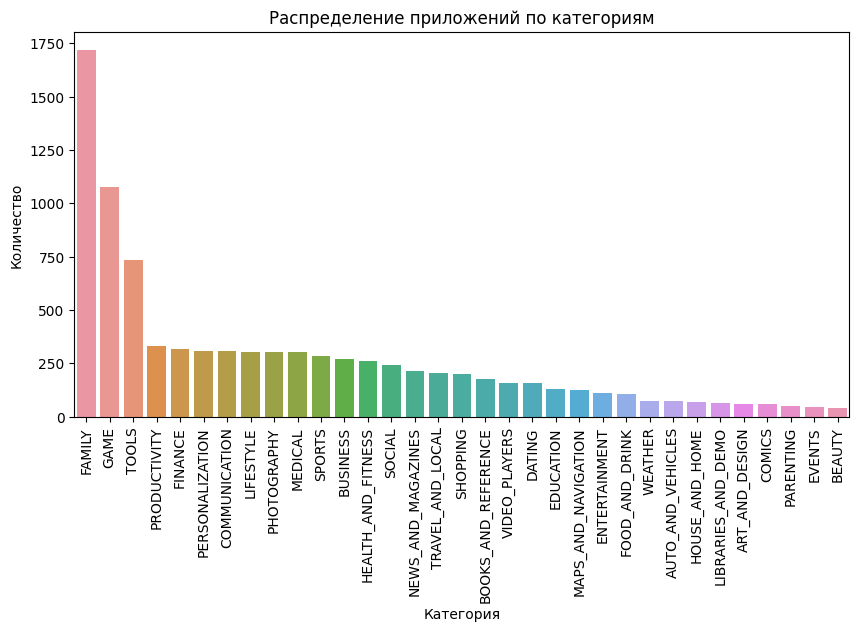

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.title('Распределение приложений по категориям')
plt.show()

In [127]:
df['category'].value_counts() / len(df['category']) * 100

FAMILY                 19.322530
GAME                   12.086428
TOOLS                   8.248931
PRODUCTIVITY            3.758722
FINANCE                 3.567409
PERSONALIZATION         3.466126
COMMUNICATION           3.454873
LIFESTYLE               3.432366
PHOTOGRAPHY             3.421112
MEDICAL                 3.398605
SPORTS                  3.218546
BUSINESS                3.038488
HEALTH_AND_FITNESS      2.948458
SOCIAL                  2.745892
NEWS_AND_MAGAZINES      2.408283
TRAVEL_AND_LOCAL        2.307000
SHOPPING                2.273239
BOOKS_AND_REFERENCE     1.991897
VIDEO_PLAYERS           1.800585
DATING                  1.789332
EDUCATION               1.451722
MAPS_AND_NAVIGATION     1.395454
ENTERTAINMENT           1.249156
FOOD_AND_DRINK          1.192888
WEATHER                 0.844024
AUTO_AND_VEHICLES       0.821517
HOUSE_AND_HOME          0.765249
LIBRARIES_AND_DEMO      0.720234
ART_AND_DESIGN          0.686473
COMICS                  0.652712
PARENTING 

##<b>Сумма отзывов по категориям</b>

Text(0.5, 1.0, 'Сумма отзывов по категориям')

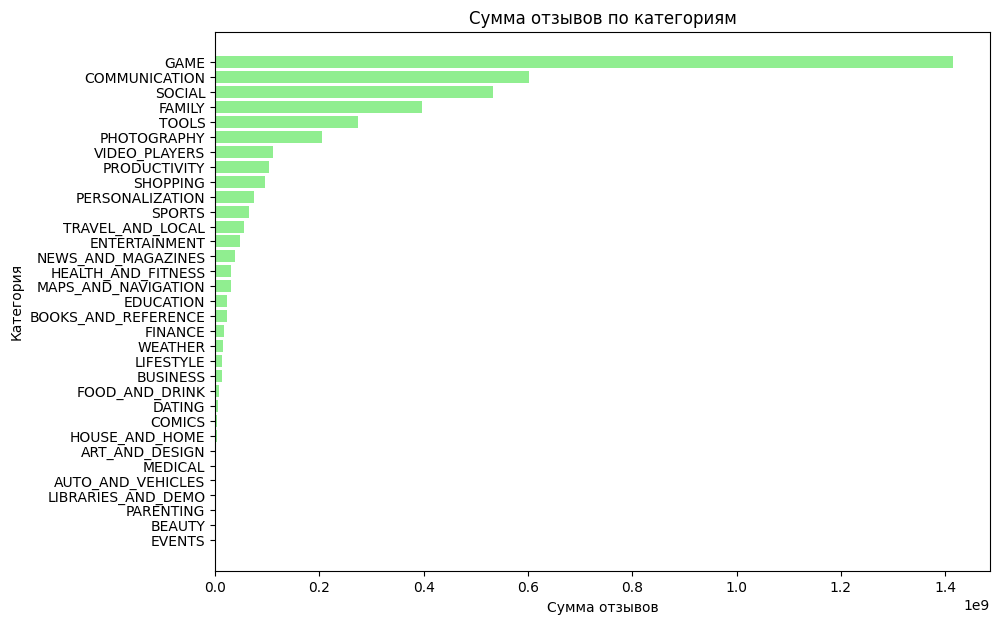

In [70]:
sum_reviews = df.groupby(['category'])['reviews'].sum().sort_values()
plt.figure(figsize=(10, 7))
plt.barh(sum_reviews.index, sum_reviews, color='lightgreen')
plt.xlabel('Сумма отзывов')
plt.ylabel('Категория')
plt.title('Сумма отзывов по категориям')

In [69]:
sum_reviews.sort_values(ascending=False)

category
GAME                   1415533878
COMMUNICATION           601273091
SOCIAL                  533576498
FAMILY                  396768541
TOOLS                   273180158
PHOTOGRAPHY             204297367
VIDEO_PLAYERS           110379692
PRODUCTIVITY            102554240
SHOPPING                 94930973
PERSONALIZATION          75192419
SPORTS                   65322107
TRAVEL_AND_LOCAL         55565013
ENTERTAINMENT            47570716
NEWS_AND_MAGAZINES       38244909
HEALTH_AND_FITNESS       30845065
MAPS_AND_NAVIGATION      30659060
EDUCATION                23164724
BOOKS_AND_REFERENCE      21872818
FINANCE                  16999569
WEATHER                  14604695
LIFESTYLE                12819560
BUSINESS                 12357705
FOOD_AND_DRINK            7671255
DATING                    5545164
COMICS                    3381945
HOUSE_AND_HOME            2794391
ART_AND_DESIGN            1714317
MEDICAL                   1396427
AUTO_AND_VEHICLES         1163630
LIBRA

##<b>Распределение оценок приложений</b>

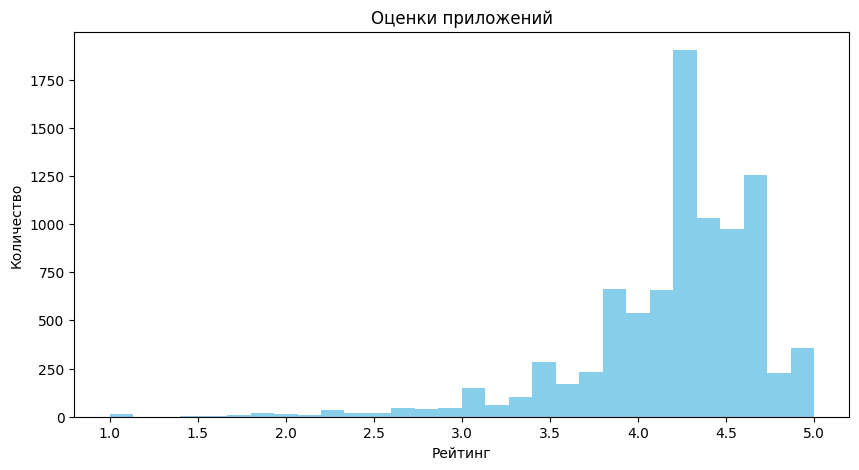

In [75]:
plt.figure(figsize=(10, 5))
plt.hist(df['rating'], bins=30, color='skyblue')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.title('Оценки приложений')
plt.show()


In [125]:
df['rating'].value_counts().head(10)

4.4    1031
4.3    1016
4.5     976
4.2     887
4.6     768
4.1     656
4.0     538
4.7     484
3.9     372
3.8     293
Name: rating, dtype: int64

In [83]:
df['rating'].describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

##<b>Взаимосвязь между рейтингов и отзывами</b>

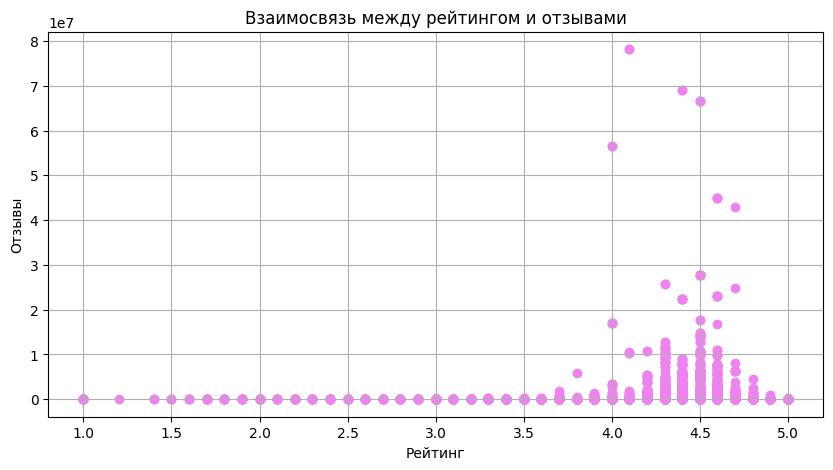

In [132]:
plt.figure(figsize=(10, 5))
plt.scatter(df['rating'], df['reviews'], color='violet')
plt.grid(True)
plt.xlabel('Рейтинг')
plt.ylabel('Отзывы')
plt.title('Взаимосвязь между рейтингом и отзывами')
plt.show()

In [95]:
df['size'].describe()

count    8886.000000
mean       31.381747
std        87.911809
min         0.000000
25%         3.100000
50%        11.000000
75%        31.000000
max       994.000000
Name: size, dtype: float64

##<b>Распределение по сумме скачиваний приложения</b>

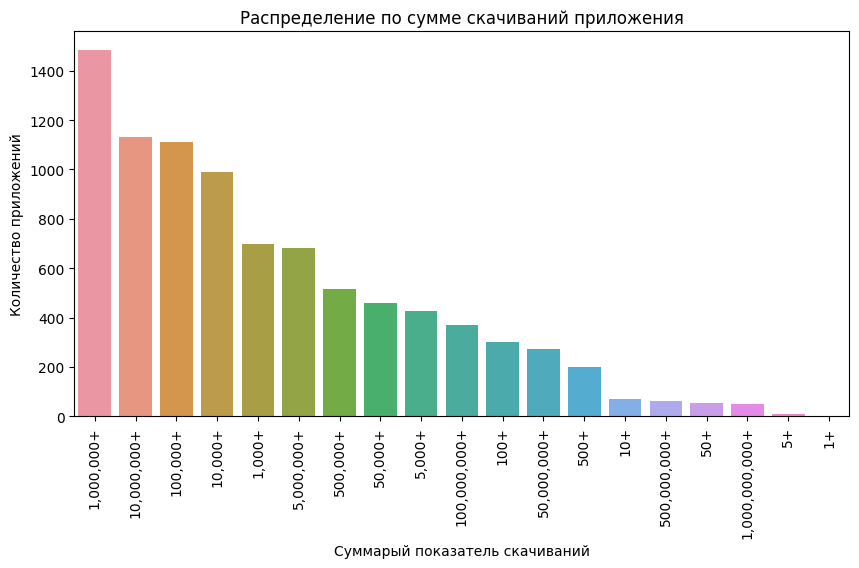

In [78]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='installs', order=df['installs'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Суммарый показатель скачиваний')
plt.ylabel('Количество приложений')
plt.title('Распределение по сумме скачиваний приложения')
plt.show()

In [81]:
df['installs'].value_counts().sort_values(ascending=False)

1,000,000+        1485
10,000,000+       1132
100,000+          1110
10,000+            988
1,000+             697
5,000,000+         683
500,000+           515
50,000+            461
5,000+             425
100,000,000+       369
100+               303
50,000,000+        272
500+               199
10+                 69
500,000,000+        61
50+                 56
1,000,000,000+      49
5+                   9
1+                   3
Name: installs, dtype: int64

##<b>Доля приложения по типу (free / paid)</b>

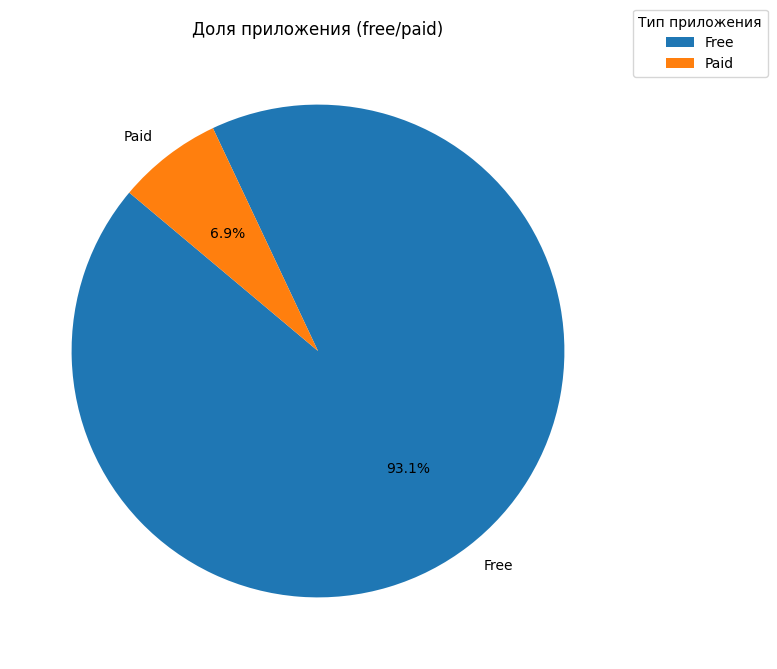

In [99]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.legend(type_counts.index, title='Тип приложения', loc='center left', bbox_to_anchor=(1, 1))
plt.title('Доля приложения (free/paid)')
plt.show()

In [100]:
type_counts

Free    8275
Paid     611
Name: type, dtype: int64

##<b>Соотношение бесплатных и платных приложений по возрастным ограничениям</b>

<Figure size 1000x500 with 0 Axes>

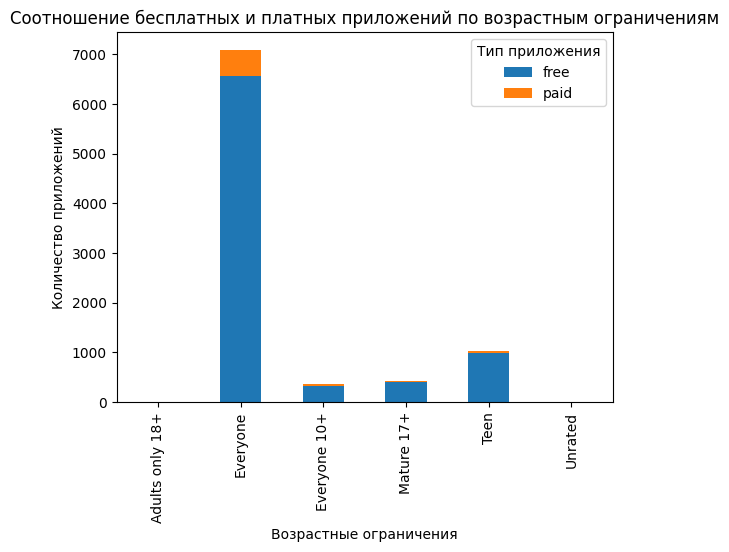

In [115]:
grouped_data = df.groupby(['content_rating', 'type']).size().unstack()
plt.figure(figsize=(10, 5))
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Возрастные ограничения')
plt.ylabel('Количество приложений')
plt.title('Соотношение бесплатных и платных приложений по возрастным ограничениям')
plt.legend(title='Тип приложения', labels=['free', 'paid'])
plt.show()

##<b>Распределение приложений по жанрам</b>

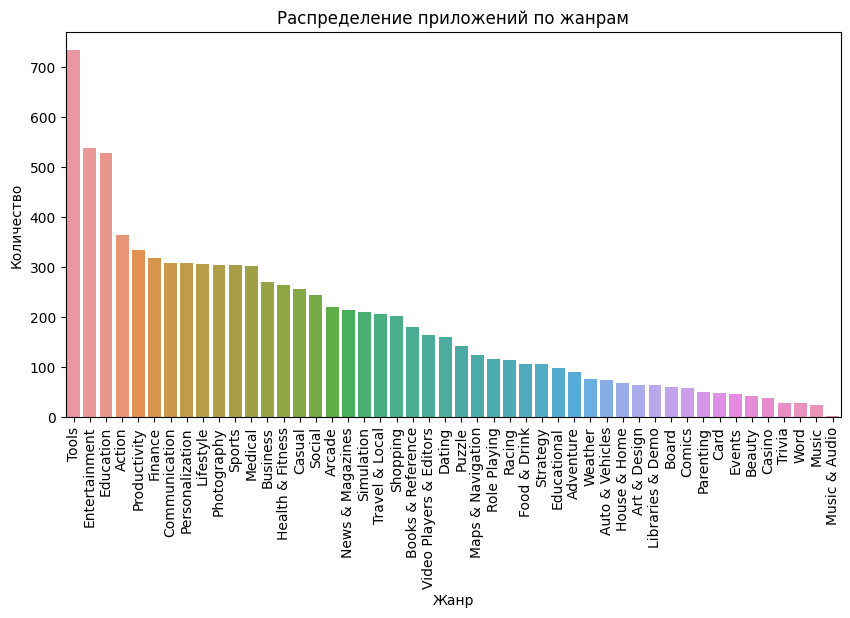

In [122]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='genres', order=df['genres'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.title('Распределение приложений по жанрам')
plt.show()

In [124]:
df['genres'].value_counts().head(10)

Tools              733
Entertainment      538
Education          528
Action             364
Productivity       334
Finance            317
Communication      308
Personalization    308
Lifestyle          306
Photography        304
Name: genres, dtype: int64

##<b>Взаимосвязь рейтинга с версией Android</b>

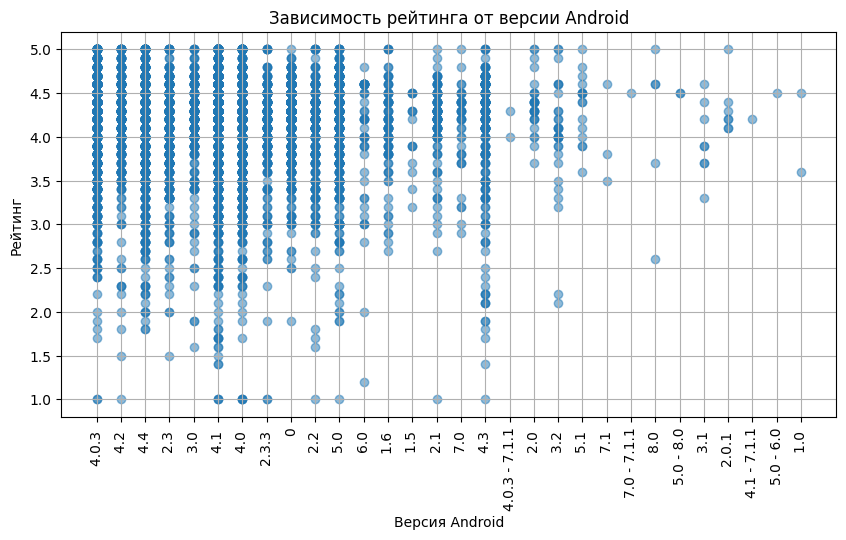

In [143]:
plt.figure(figsize=(10, 5))
plt.scatter(df['android_ver'], df['rating'], alpha=0.5)
plt.grid(True)
plt.xticks(rotation=90)
plt.title('Зависимость рейтинга от версии Android')
plt.xlabel('Версия Android')
plt.ylabel('Рейтинг')
plt.show()

##<b>Дата последнего обновления</b>

In [152]:
df.groupby('android_ver')['last_updated'].max().reset_index()



,android_ver,last_updated
0,0,2018-08-08
1,1.0,2018-08-04
2,1.5,2018-08-04
3,1.6,2018-08-06
4,2.0,2018-07-09
5,2.0.1,2018-01-18
6,2.1,2018-07-21
7,2.2,2018-08-03
8,2.3,2018-08-07
9,2.3.3,2018-08-01


#<b>Общий вывод:</b>

- Самой популярной категорией среди всех приложений является <b>'family'</b> с долей в <b>19%</b> от общего числа приложений. Однако категория <b>'games'</b> имеет наибольшее количество отзывов, что указывает на высокую активность пользователей в этой категории.
- Большинство приложений имеют рейтинг от <b>4.2 до 4.5</b>, и наблюдается тенденция: чем выше рейтинг, тем больше отзывов у приложения.
- Средний размер приложения составляет <b>31</b> мегабайт.
- Около <b>1500</b> приложений были скачаны более <b>1 миллиона</b> раз, что свидетельствует о популярности этих приложений.
- Большинство приложений (<b>93%</b>) являются бесплатными.
- Большинство приложений не имеют возрастных ограничений, но около <b>5%</b> приложений из категории для всех - являются платными.
- Самым популярным жанром приложений является <b>'tools'</b>.
- Рейтинг приложения может зависеть от версии Android, и старые версии Android могут сталкиваться с большим количеством проблем. Однако стоит отметить, что все версии Android, кроме 3.1, регулярно обновляются, что способствует поддержке более новых версий операционной системы.